Loading MNIST dataset...
Dataset shape: (70000, 784)
Sample label: 5
Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== Model Evaluation ===
Accuracy: 0.9923571428571428

Confusion Matrix:
 [[12563    56]
 [   51  1330]]

Classification Report:
               precision    recall  f1-score   support

       Not 0       1.00      1.00      1.00     12619
           0       0.96      0.96      0.96      1381

    accuracy                           0.99     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.99      0.99      0.99     14000



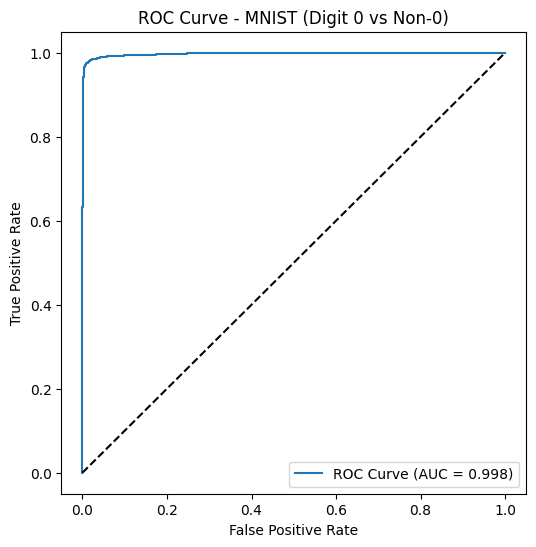

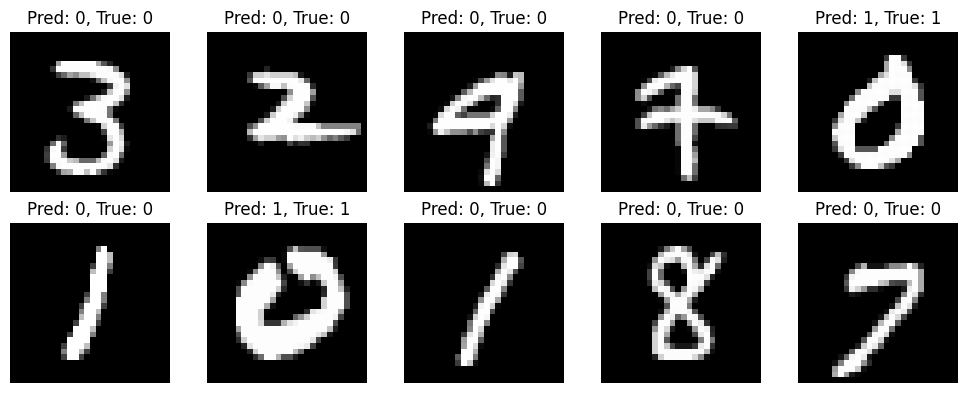

In [1]:
# Install and import libraries (if needed)
!pip install scikit-learn matplotlib --quiet

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# -------------------------------
# 1️⃣ Load MNIST Dataset
# -------------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

print("Dataset shape:", X.shape)
print("Sample label:", y[0])

# -------------------------------
# 2️⃣ Create Binary Labels
# -------------------------------
# Let's classify "0" vs "not 0"
y_binary = (y == 0).astype(int)  # 1 if digit is 0, else 0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# -------------------------------
# 3️⃣ Train Binary Classifier
# -------------------------------
print("Training Logistic Regression model...")
model = LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

# -------------------------------
# 4️⃣ Evaluate Model
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== Model Evaluation ===")
print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not 0', '0']))

# -------------------------------
# 5️⃣ ROC Curve & AUC
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MNIST (Digit 0 vs Non-0)")
plt.legend()
plt.show()

# -------------------------------
# 6️⃣ Visualize Predictions
# -------------------------------
plt.figure(figsize=(10, 4))
for i, index in enumerate(np.random.choice(len(X_test), 10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred[index]}, True: {y_test[index]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
